In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import psutil

In [2]:
absolute_path = '/Users/jonathan/Library/Mobile Documents/com~apple~CloudDocs/國泰/外匯回測/TWD_data_daily_main.xlsx'
excel_data = pd.read_excel(absolute_path, sheet_name=None)

Mon_df = excel_data['Mon']
Tue_df = excel_data['Tue']
Wed_df = excel_data['Wed']
Thu_df = excel_data['Thu']
Fri_df = excel_data['Fri']
Sat_df = excel_data['Sat']
full_df = excel_data['full']

In [3]:
full_df

,Date,Week,USDTWD,TWD變動率,外資買賣超,外資變動率
0,2023-10-25,Wednesday,32.341,-0.000774,-145.71,-0.615409
1,2023-10-24,Tuesday,32.316,0.000989,-378.87,-0.103775
2,2023-10-23,Monday,32.348,-0.000866,-422.74,0.356980
3,2023-10-20,Friday,32.320,0.000093,-311.53,-0.229858
4,2023-10-19,Thursday,32.323,-0.001022,-404.51,0.250340
...,...,...,...,...,...,...
5985,1999-11-1,Monday,31.731,0.000284,NaN,NaN
5986,1999-10-29,Friday,31.740,0.000095,NaN,NaN
5987,1999-10-28,Thursday,31.743,0.000126,NaN,NaN
5988,1999-10-27,Wednesday,31.747,0.000189,NaN,NaN


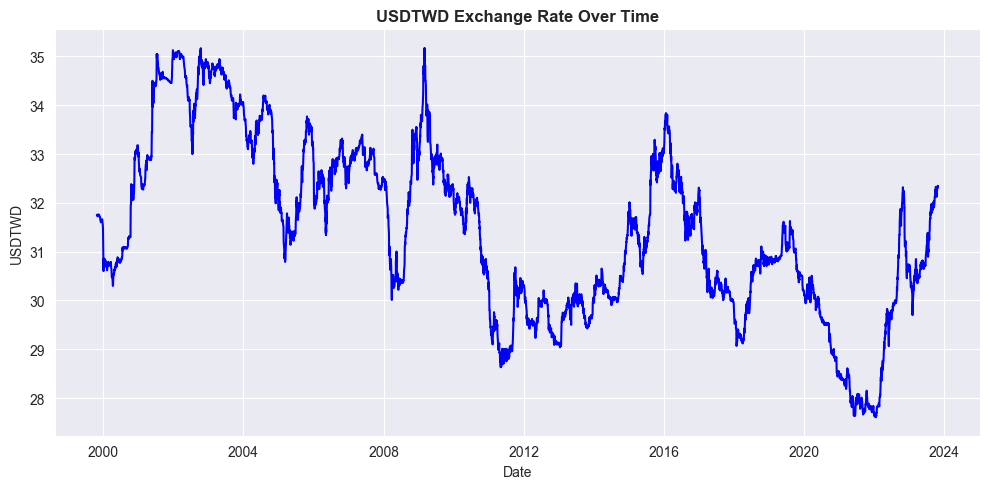

In [4]:
full_df['Date'] = pd.to_datetime(full_df['Date'])
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(full_df['Date'], full_df['USDTWD'],color='b')

# Customize the plot
plt.title('USDTWD Exchange Rate Over Time', fontsize=12,   fontweight='bold')
plt.xlabel('Date', fontsize=10)
plt.ylabel('USDTWD', fontsize=10)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
# Split into time periods
# Time Period 1: 2000-2009
df_2000_2009 = full_df[(full_df['Date'] >= '2000-01-01') & (full_df['Date'] <= '2009-12-31')]
# Time Period 2: 2010-2019
df_2010_2019 = full_df[(full_df['Date'] >= '2010-01-01') & (full_df['Date'] <= '2019-12-31')]
# Time Period 3: After 2020
df_after2020 = full_df[full_df['Date'] >= '2020-01-01']

print(df_2000_2009)
print(df_2010_2019)
print(df_after2020)


           Date       Week  USDTWD    TWD變動率   外資買賣超     外資變動率
3435 2009-12-31   Thursday  32.030  0.006452  286.50 -0.155191
3436 2009-12-30  Wednesday  32.238  0.001610  339.13  1.122082
3437 2009-12-29    Tuesday  32.290  0.000124  159.81 -0.503140
3438 2009-12-28     Monday  32.294 -0.000620  321.64  1.597642
3439 2009-12-25     Friday  32.274  0.000805  123.82 -0.735088
...         ...        ...     ...       ...     ...       ...
5939 2000-01-10     Monday  30.835  0.000810  191.52 -2.096970
5940 2000-01-07     Friday  30.860 -0.000194 -174.59  1.422170
5941 2000-01-06   Thursday  30.854 -0.001753  -72.08  3.443896
5942 2000-01-05  Wednesday  30.800 -0.006470  -16.22 -1.116089
5943 2000-01-04    Tuesday  30.602  0.025259  139.72       NaN

[2509 rows x 6 columns]
           Date       Week  USDTWD    TWD變動率   外資買賣超      外資變動率
947  2019-12-31    Tuesday  30.106  0.000962 -328.02   5.207797
948  2019-12-30     Monday  30.135  0.002251  -52.84  -1.215806
949  2019-12-27     Friday 

Data Cleaning

In [6]:
# Define a function to calculate the percentage change for each day of the week
def calculate_percentage_change(df, day):
    df_day = df[df['Week'] == day]
    df_day = df_day['TWD變動率'] * 100
    return df_day

# Apply the function to different dataframes and days of the week
full_df_Mon = calculate_percentage_change(full_df, 'Monday')
full_df_Tue = calculate_percentage_change(full_df, 'Tuesday')
full_df_Wed = calculate_percentage_change(full_df, 'Wednesday')
full_df_Thu = calculate_percentage_change(full_df, 'Thursday')
full_df_Fri = calculate_percentage_change(full_df, 'Friday')
full_df_Sat = calculate_percentage_change(full_df, 'Saturday')

df_2000_2009_Mon = calculate_percentage_change(df_2000_2009, 'Monday')
df_2000_2009_Tue = calculate_percentage_change(df_2000_2009, 'Tuesday')
df_2000_2009_Wed = calculate_percentage_change(df_2000_2009, 'Wednesday')
df_2000_2009_Thu = calculate_percentage_change(df_2000_2009, 'Thursday')
df_2000_2009_Fri = calculate_percentage_change(df_2000_2009, 'Friday')
df_2000_2009_Sat = calculate_percentage_change(df_2000_2009, 'Saturday')

df_2010_2019_Mon = calculate_percentage_change(df_2010_2019, 'Monday')
df_2010_2019_Tue = calculate_percentage_change(df_2010_2019, 'Tuesday')
df_2010_2019_Wed = calculate_percentage_change(df_2010_2019, 'Wednesday')
df_2010_2019_Thu = calculate_percentage_change(df_2010_2019, 'Thursday')
df_2010_2019_Fri = calculate_percentage_change(df_2010_2019, 'Friday')
df_2010_2019_Sat = calculate_percentage_change(df_2010_2019, 'Saturday')

df_after2020_Mon = calculate_percentage_change(df_after2020, 'Monday')
df_after2020_Tue = calculate_percentage_change(df_after2020, 'Tuesday')
df_after2020_Wed = calculate_percentage_change(df_after2020, 'Wednesday')
df_after2020_Thu = calculate_percentage_change(df_after2020, 'Thursday')
df_after2020_Fri = calculate_percentage_change(df_after2020, 'Friday')
df_after2020_Sat = calculate_percentage_change(df_after2020, 'Saturday')

In [7]:
# Remove outliers for full_df
for day in ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']:
    mean_val = np.mean(locals()[f'full_df_{day}'])
    std_dev = np.std(locals()[f'full_df_{day}'])
    lower_bound, upper_bound = mean_val - 4 * std_dev, mean_val + 4 * std_dev
    locals()[f'full_df_{day}'] = locals()[f'full_df_{day}'][(locals()[f'full_df_{day}'] >= lower_bound) & (locals()[f'full_df_{day}'] <= upper_bound)]

# Remove outliers for df_2000_2009 to df_after2020
for period in ['2000_2009', '2010_2019']:
    for day in ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']:
        df_name = f'df_{period}_{day}'
        mean_val, std_dev = np.mean(locals()[df_name]), np.std(locals()[df_name])
        lower_bound, upper_bound = mean_val - 4 * std_dev, mean_val + 4 * std_dev
        locals()[df_name] = locals()[df_name][(locals()[df_name] >= lower_bound) & (locals()[df_name] <= upper_bound)]

for day in ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']:
    mean_val = np.mean(locals()[f'df_after2020_{day}'])
    std_dev = np.std(locals()[f'df_after2020_{day}'])
    lower_bound, upper_bound = mean_val - 4 * std_dev, mean_val + 4 * std_dev
    locals()[f'df_after2020_{day}'] = locals()[f'df_after2020_{day}'][(locals()[f'df_after2020_{day}'] >= lower_bound) & (locals()[f'df_after2020_{day}'] <= upper_bound)]

Visulization for All Time & Periods

All Time 2000-2023


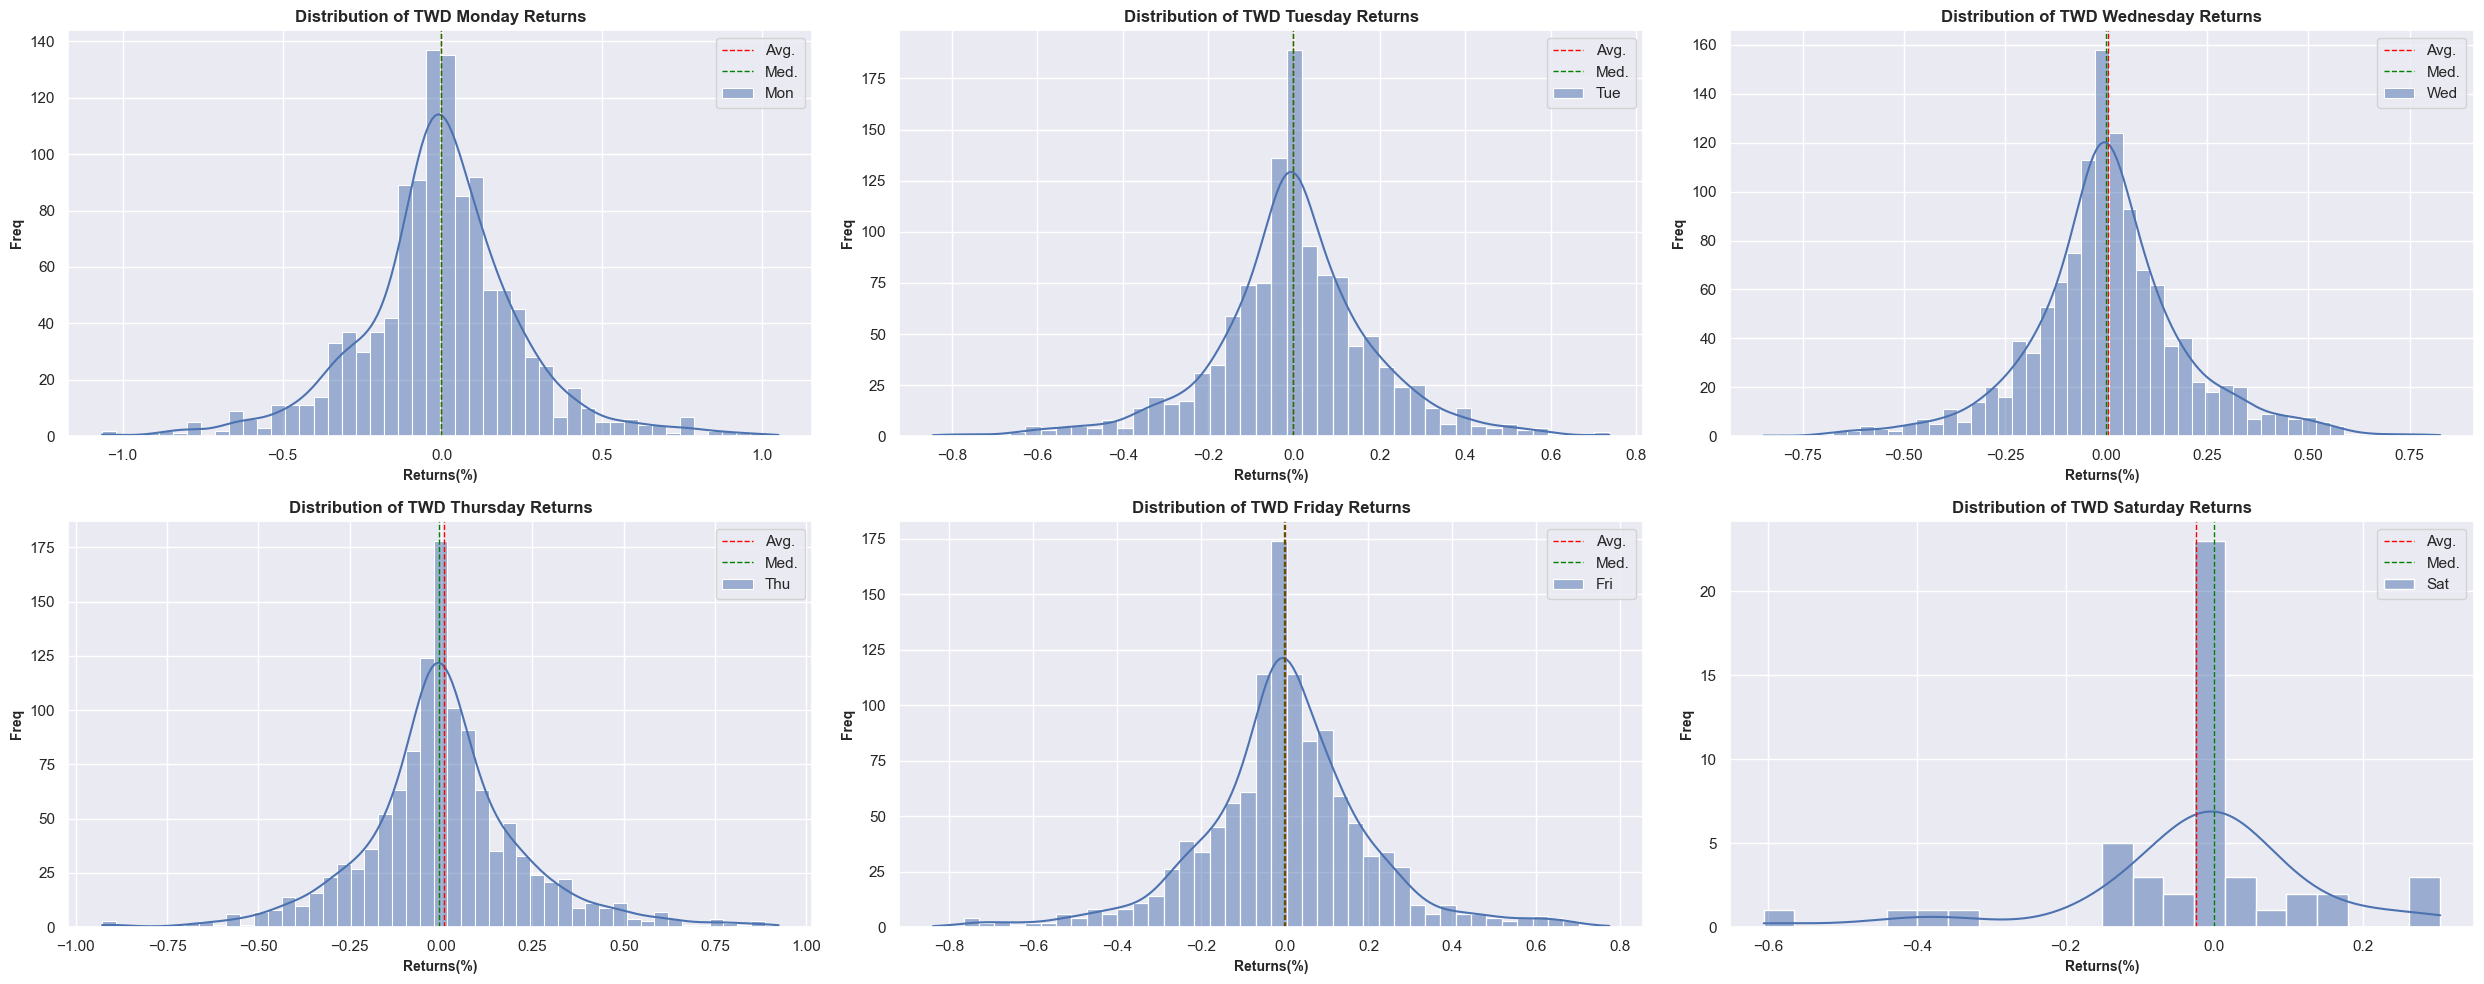

In [8]:
print("All Time 2000-2023")
sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 3, figsize=(25, 10))

#Mon
sns.histplot(full_df_Mon, kde=True, label='Mon', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of TWD Monday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[0, 0].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[0, 0].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Mon = full_df_Mon.mean()
median_value_Mon = full_df_Mon.median()
skewness_Mon = skew(full_df_Mon)
kurt_Mon = kurtosis(full_df_Mon)
std_dev_Mon = full_df_Mon.std()
max_value_Mon = full_df_Mon.max()
min_value_Mon = full_df_Mon.min()
sample_size_Mon = full_df_Mon.count()
axes[0, 0].axvline(mean_value_Mon, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[0, 0].axvline(median_value_Mon, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[0, 0].legend()

#Tue
sns.histplot(full_df_Tue, kde=True, label='Tue', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of TWD Tuesday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[0, 1].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[0, 1].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Tue = full_df_Tue.mean()
median_value_Tue = full_df_Tue.median()
skewness_Tue = skew(full_df_Tue)
kurt_Tue = kurtosis(full_df_Tue)
std_dev_Tue = full_df_Tue.std()
max_value_Tue = full_df_Tue.max()
min_value_Tue = full_df_Tue.min()
sample_size_Tue = full_df_Tue.count()
axes[0, 1].axvline(mean_value_Tue, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[0, 1].axvline(median_value_Tue, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[0, 1].legend()

#Wed
sns.histplot(full_df_Wed, kde=True, label='Wed', ax=axes[0, 2])
axes[0, 2].set_title('Distribution of TWD Wednesday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[0, 2].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[0, 2].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Wed = full_df_Wed.mean()
median_value_Wed = full_df_Wed.median()
skewness_Wed = skew(full_df_Wed)
kurt_Wed = kurtosis(full_df_Wed)
std_dev_Wed = full_df_Wed.std()
max_value_Wed = full_df_Wed.max()
min_value_Wed = full_df_Wed.min()
sample_size_Wed = full_df_Wed.count()
axes[0, 2].axvline(mean_value_Wed, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[0, 2].axvline(median_value_Wed, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[0, 2].legend()

#Thu
sns.histplot(full_df_Thu, kde=True, label='Thu', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of TWD Thursday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 0].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[1, 0].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Thu = full_df_Thu.mean()
median_value_Thu = full_df_Thu.median()
skewness_Thu = skew(full_df_Thu)
kurt_Thu = kurtosis(full_df_Thu)
std_dev_Thu = full_df_Thu.std()
max_value_Thu = full_df_Thu.max()
min_value_Thu = full_df_Thu.min()
sample_size_Thu = full_df_Thu.count()
axes[1, 0].axvline(mean_value_Thu, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[1, 0].axvline(median_value_Thu, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[1, 0].legend()

#Fri
sns.histplot(full_df_Fri, kde=True, label='Fri', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of TWD Friday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 1].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[1, 1].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Fri = full_df_Fri.mean()
median_value_Fri = full_df_Fri.median()
skewness_Fri = skew(full_df_Fri)
kurt_Fri = kurtosis(full_df_Fri)
std_dev_Fri = full_df_Fri.std()
max_value_Fri = full_df_Fri.max()
min_value_Fri = full_df_Fri.min()
sample_size_Fri = full_df_Fri.count()
axes[1, 1].axvline(mean_value_Fri, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[1, 1].axvline(median_value_Fri, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[1, 1].legend()

#Sat
sns.histplot(full_df_Sat, kde=True, label='Sat', ax=axes[1, 2])
axes[1, 2].set_title('Distribution of TWD Saturday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 2].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[1, 2].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Sat = full_df_Sat.mean()
median_value_Sat = full_df_Sat.median()
skewness_Sat = skew(full_df_Sat)        
kurt_Sat = kurtosis(full_df_Sat)
std_dev_Sat = full_df_Sat.std()
max_value_Sat = full_df_Sat.max()
min_value_Sat = full_df_Sat.min()
sample_size_Sat = full_df_Sat.count()
axes[1, 2].axvline(mean_value_Sat, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[1, 2].axvline(median_value_Sat, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

In [9]:
# Create a DataFrame for Saturday statistics using the full dataset
stats_full = pd.DataFrame({
    'Mean': [mean_value_Mon, mean_value_Tue, mean_value_Wed, mean_value_Thu, mean_value_Fri, mean_value_Sat],
    'Median': [median_value_Mon, median_value_Tue, median_value_Wed, median_value_Thu, median_value_Fri, median_value_Sat],
    'Skewness': [skewness_Mon, skewness_Tue, skewness_Wed, skewness_Thu, skewness_Fri, skewness_Sat],
    'Kurtosis': [kurt_Mon, kurt_Tue, kurt_Wed, kurt_Thu, kurt_Fri, kurt_Sat],
    'Standard Deviation': [std_dev_Mon, std_dev_Tue, std_dev_Wed, std_dev_Thu, std_dev_Fri, std_dev_Sat],
    'Max Value': [max_value_Mon, max_value_Tue, max_value_Wed, max_value_Thu, max_value_Fri, max_value_Sat],
    'Min Value': [min_value_Mon, min_value_Tue, min_value_Wed, min_value_Thu, min_value_Fri, min_value_Sat],
    'Sample Size': [sample_size_Mon, sample_size_Tue, sample_size_Wed, sample_size_Thu, sample_size_Fri, sample_size_Sat]
}, index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

print("All Time 2000-2023")
stats_full = stats_full.T
stats_full

All Time 2000-2023


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Mean,-0.005124,-0.001912,0.005356,0.007084,0.000447,-0.023969
Median,-0.005763,-0.003111,0.000000,-0.006275,-0.001427,0.000000
Skewness,0.014052,-0.235807,0.087505,0.236453,-0.075891,-1.233719
Kurtosis,2.191804,2.062126,1.954671,2.399065,2.218430,3.314095
Standard Deviation,0.253621,0.191436,0.195725,0.225926,0.202302,0.161062
Max Value,1.050736,0.737068,0.825814,0.923745,0.774437,0.303634
Min Value,-1.063644,-0.844014,-0.846198,-0.927554,-0.838098,-0.605653
Sample Size,1161.000000,1190.000000,1195.000000,1195.000000,1170.000000,48.000000


Period One 2000-2009


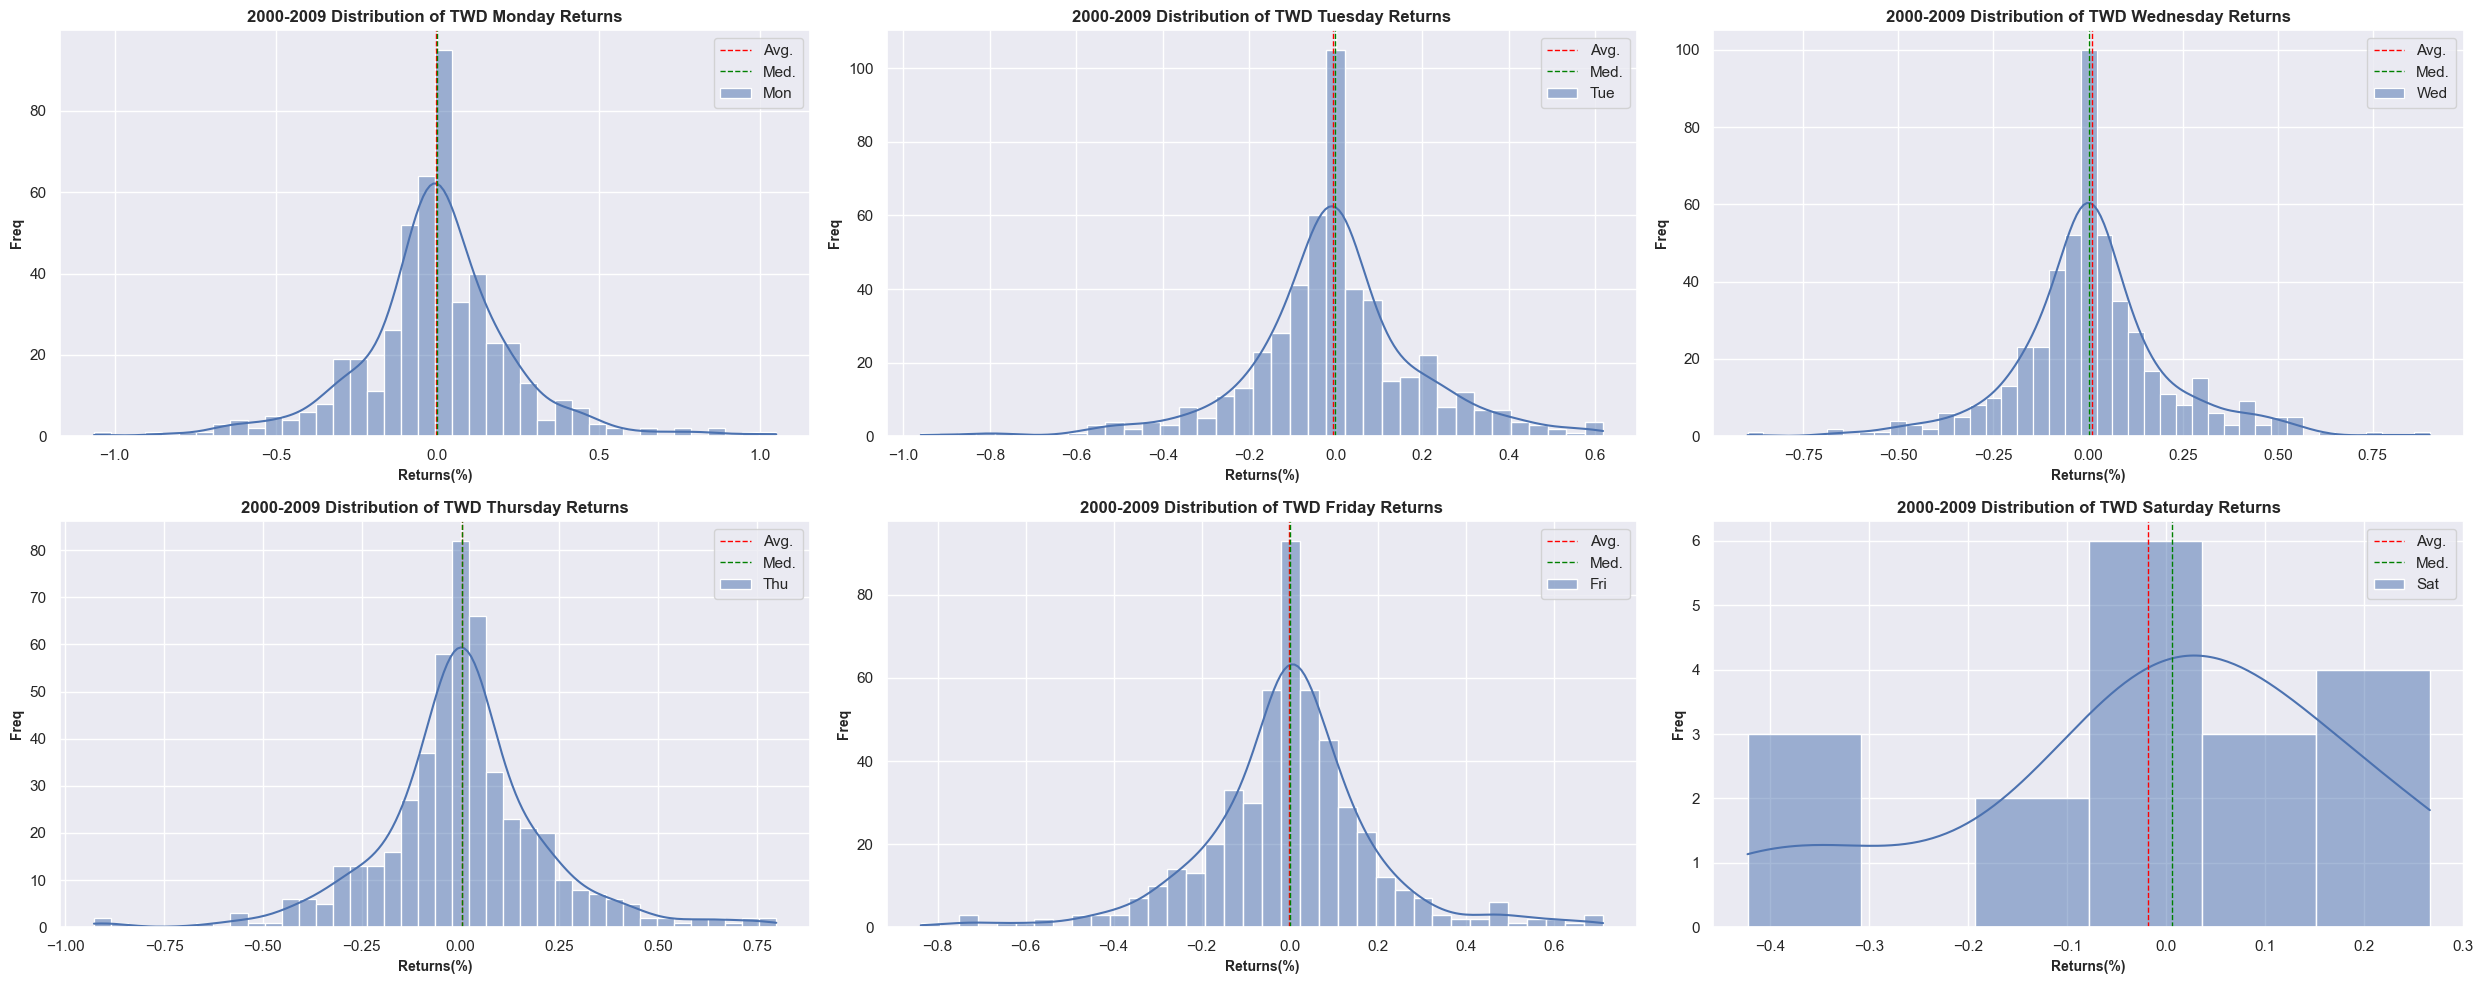

In [10]:
print("Period One 2000-2009")
sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 3, figsize=(25, 10))

# Plotting for Monday
sns.histplot(df_2000_2009_Mon, kde=True, label='Mon', ax=axes[0, 0])
axes[0, 0].set_title('2000-2009 Distribution of TWD Monday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[0, 0].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[0, 0].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Mon = df_2000_2009_Mon.mean()
median_value_Mon = df_2000_2009_Mon.median()
skewness_Mon = skew(df_2000_2009_Mon)
kurt_Mon = kurtosis(df_2000_2009_Mon)
std_dev_Mon = df_2000_2009_Mon.std()
max_value_Mon = df_2000_2009_Mon.max()
min_value_Mon = df_2000_2009_Mon.min()
sample_size_Mon = df_2000_2009_Mon.count()
axes[0, 0].axvline(mean_value_Mon, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[0, 0].axvline(median_value_Mon, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[0, 0].legend()

# Plotting for Tuesday
sns.histplot(df_2000_2009_Tue, kde=True, label='Tue', ax=axes[0, 1])
axes[0, 1].set_title('2000-2009 Distribution of TWD Tuesday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[0, 1].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[0, 1].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Tue = df_2000_2009_Tue.mean()
median_value_Tue = df_2000_2009_Tue.median()
skewness_Tue = skew(df_2000_2009_Tue)
kurt_Tue = kurtosis(df_2000_2009_Tue)
std_dev_Tue = df_2000_2009_Tue.std()
max_value_Tue = df_2000_2009_Tue.max()
min_value_Tue = df_2000_2009_Tue.min()
sample_size_Tue = df_2000_2009_Tue.count()
axes[0, 1].axvline(mean_value_Tue, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[0, 1].axvline(median_value_Tue, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[0, 1].legend()

# Plotting for Wednesday
sns.histplot(df_2000_2009_Wed, kde=True, label='Wed', ax=axes[0, 2])
axes[0, 2].set_title('2000-2009 Distribution of TWD Wednesday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[0, 2].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[0, 2].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Wed = df_2000_2009_Wed.mean()
median_value_Wed = df_2000_2009_Wed.median()
skewness_Wed = skew(df_2000_2009_Wed)
kurt_Wed = kurtosis(df_2000_2009_Wed)
std_dev_Wed = df_2000_2009_Wed.std()
max_value_Wed = df_2000_2009_Wed.max()
min_value_Wed = df_2000_2009_Wed.min()
sample_size_Wed = df_2000_2009_Wed.count()
axes[0, 2].axvline(mean_value_Wed, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[0, 2].axvline(median_value_Wed, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[0, 2].legend()

# Plotting for Thursday
sns.histplot(df_2000_2009_Thu, kde=True, label='Thu', ax=axes[1, 0])
axes[1, 0].set_title('2000-2009 Distribution of TWD Thursday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 0].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[1, 0].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Thu = df_2000_2009_Thu.mean()
median_value_Thu = df_2000_2009_Thu.median()
skewness_Thu = skew(df_2000_2009_Thu)
kurt_Thu = kurtosis(df_2000_2009_Thu)
std_dev_Thu = df_2000_2009_Thu.std()
max_value_Thu = df_2000_2009_Thu.max()
min_value_Thu = df_2000_2009_Thu.min()
sample_size_Thu = df_2000_2009_Thu.count()
axes[1, 0].axvline(mean_value_Thu, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[1, 0].axvline(median_value_Thu, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[1, 0].legend()

# Plotting for Friday
sns.histplot(df_2000_2009_Fri, kde=True, label='Fri', ax=axes[1, 1])
axes[1, 1].set_title('2000-2009 Distribution of TWD Friday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 1].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[1, 1].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Fri = df_2000_2009_Fri.mean()
median_value_Fri = df_2000_2009_Fri.median()
skewness_Fri = skew(df_2000_2009_Fri)
kurt_Fri = kurtosis(df_2000_2009_Fri)
std_dev_Fri = df_2000_2009_Fri.std()
max_value_Fri = df_2000_2009_Fri.max()
min_value_Fri = df_2000_2009_Fri.min()
sample_size_Fri = df_2000_2009_Fri.count()
axes[1, 1].axvline(mean_value_Fri, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[1, 1].axvline(median_value_Fri, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[1, 1].legend()

# Plotting for Saturday
sns.histplot(df_2000_2009_Sat, kde=True, label='Sat', ax=axes[1, 2])
axes[1, 2].set_title('2000-2009 Distribution of TWD Saturday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 2].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[1, 2].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Sat = df_2000_2009_Sat.mean()
median_value_Sat = df_2000_2009_Sat.median()
skewness_Sat = skew(df_2000_2009_Sat)
kurt_Sat = kurtosis(df_2000_2009_Sat)
std_dev_Sat = df_2000_2009_Sat.std()
max_value_Sat = df_2000_2009_Sat.max()
min_value_Sat = df_2000_2009_Sat.min()
sample_size_Sat = df_2000_2009_Sat.count()
axes[1, 2].axvline(mean_value_Sat, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[1, 2].axvline(median_value_Sat, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[1, 2].legend()

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [11]:
# Create a DataFrame for Saturday statistics in the 2000-2009 time period
stats_2000_2009 = pd.DataFrame({
    'Mean': [df_2000_2009_Mon.mean(), df_2000_2009_Tue.mean(), df_2000_2009_Wed.mean(), df_2000_2009_Thu.mean(), df_2000_2009_Fri.mean(), mean_value_Sat],
    'Median': [df_2000_2009_Mon.median(), df_2000_2009_Tue.median(), df_2000_2009_Wed.median(), df_2000_2009_Thu.median(), df_2000_2009_Fri.median(), median_value_Sat],
    'Skewness': [skew(df_2000_2009_Mon), skew(df_2000_2009_Tue), skew(df_2000_2009_Wed), skew(df_2000_2009_Thu), skew(df_2000_2009_Fri), skewness_Sat],
    'Kurtosis': [kurtosis(df_2000_2009_Mon), kurtosis(df_2000_2009_Tue), kurtosis(df_2000_2009_Wed), kurtosis(df_2000_2009_Thu), kurtosis(df_2000_2009_Fri), kurt_Sat],
    'Standard Deviation': [df_2000_2009_Mon.std(), df_2000_2009_Tue.std(), df_2000_2009_Wed.std(), df_2000_2009_Thu.std(), df_2000_2009_Fri.std(), std_dev_Sat],
    'Max Value': [df_2000_2009_Mon.max(), df_2000_2009_Tue.max(), df_2000_2009_Wed.max(), df_2000_2009_Thu.max(), df_2000_2009_Fri.max(), max_value_Sat],
    'Min Value': [df_2000_2009_Mon.min(), df_2000_2009_Tue.min(), df_2000_2009_Wed.min(), df_2000_2009_Thu.min(), df_2000_2009_Fri.min(), min_value_Sat],
    'Sample Size': [df_2000_2009_Mon.count(), df_2000_2009_Tue.count(), df_2000_2009_Wed.count(), df_2000_2009_Thu.count(), df_2000_2009_Fri.count(), sample_size_Sat]
}, index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

print("Period One 2000-2009")
stats_2000_2009 = stats_2000_2009.T
stats_2000_2009

Period One 2000-2009


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Mean,-0.003043,-0.006265,0.010795,0.004983,-0.002196,-0.018311
Median,0.000000,-0.003077,0.003144,0.002939,0.000000,0.006216
Skewness,0.065551,-0.393259,0.134652,-0.005248,-0.108414,-0.664476
Kurtosis,3.051507,2.815771,2.560150,3.099173,2.958079,-0.281860
Standard Deviation,0.241990,0.201786,0.202345,0.213886,0.197158,0.200506
Max Value,1.050736,0.617550,0.900352,0.799144,0.712435,0.266324
Min Value,-1.063644,-0.959398,-0.896107,-0.927554,-0.838098,-0.422662
Sample Size,487.000000,493.000000,496.000000,498.000000,498.000000,18.000000


Period Two 2010-2019


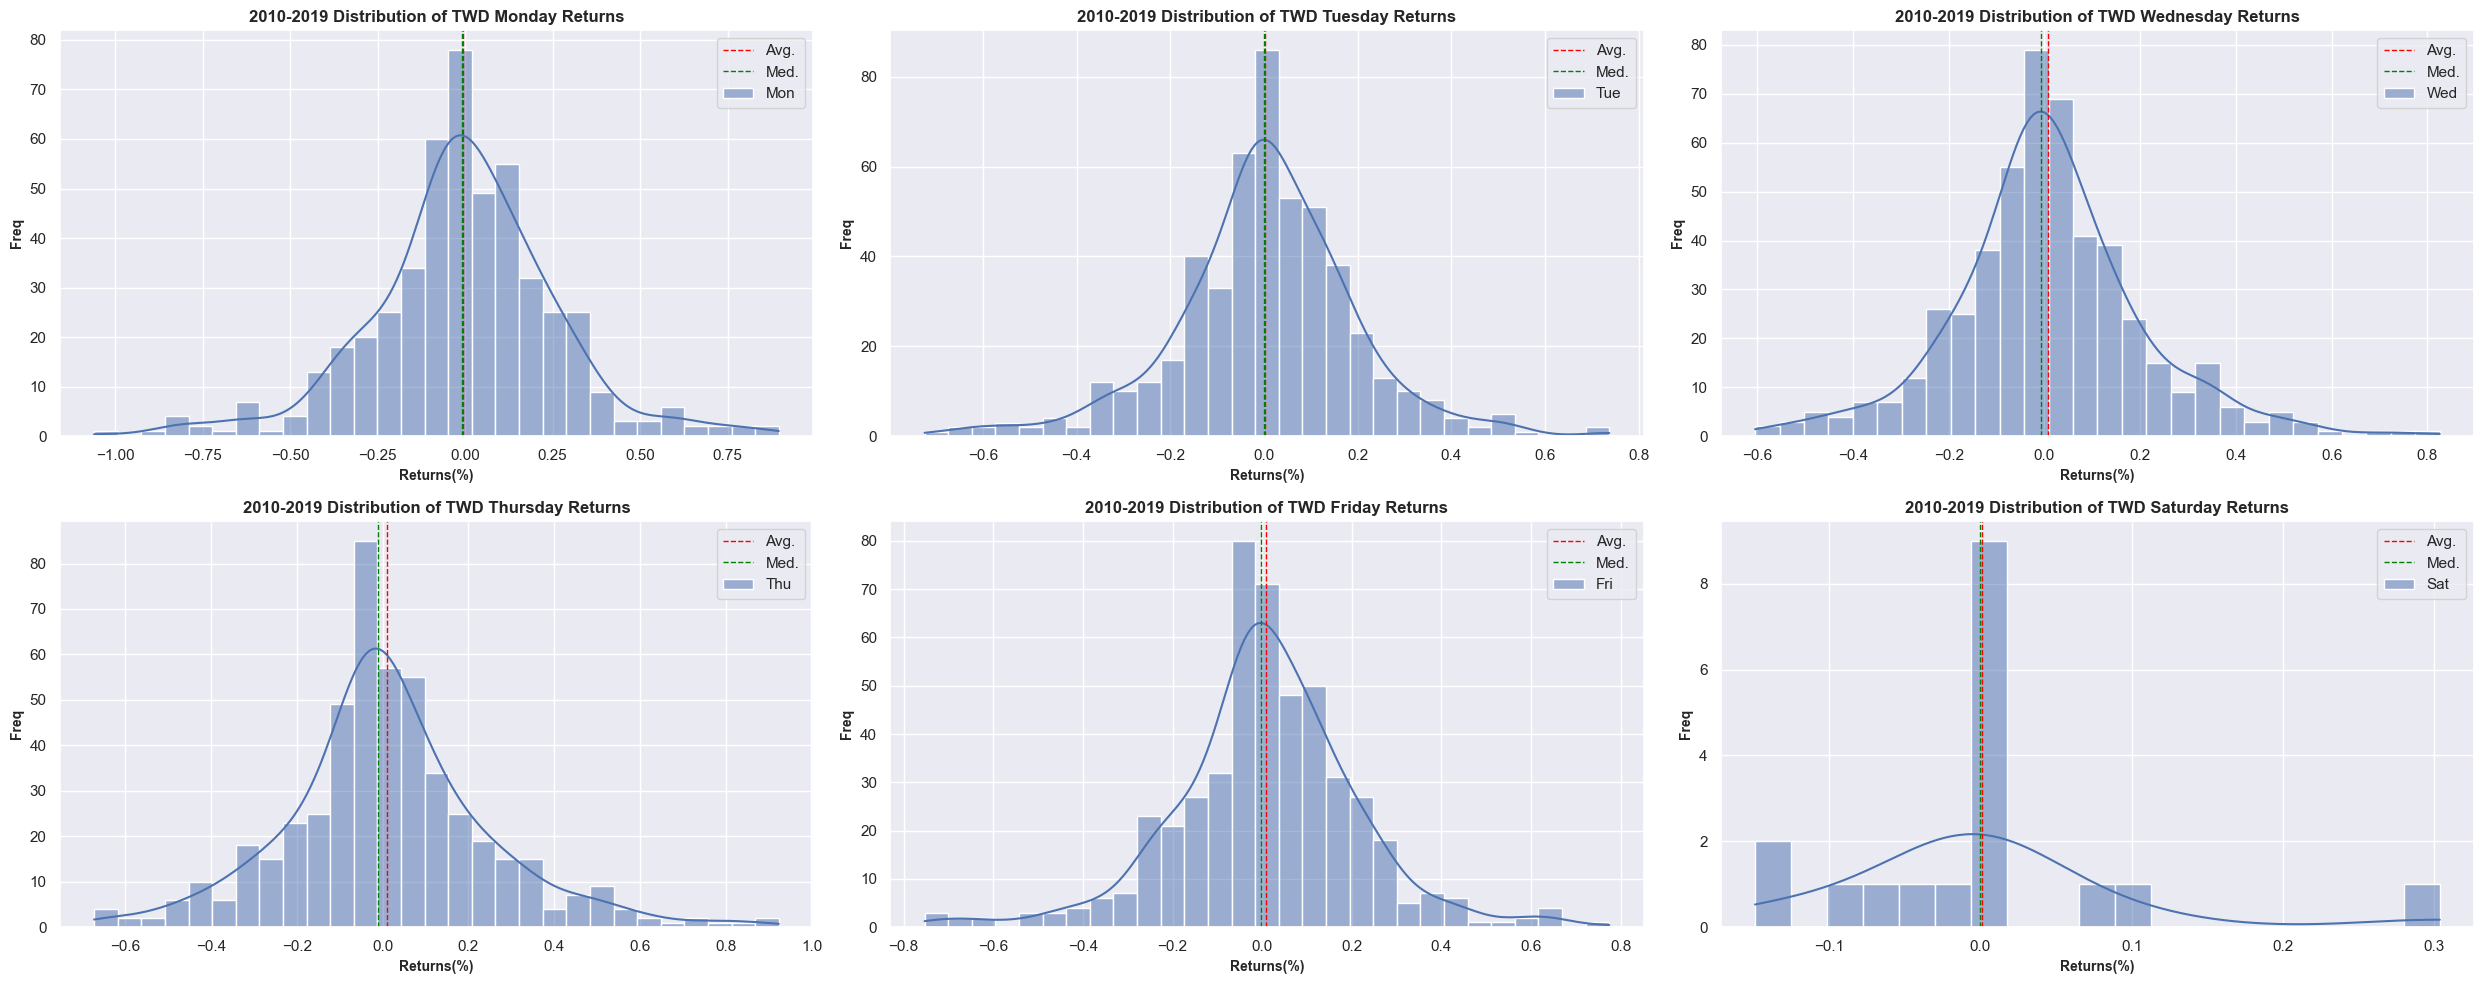

In [12]:
print("Period Two 2010-2019")
sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 3, figsize=(25, 10))

# Plotting for Monday
sns.histplot(df_2010_2019_Mon, kde=True, label='Mon', ax=axes[0, 0])
axes[0, 0].set_title('2010-2019 Distribution of TWD Monday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[0, 0].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[0, 0].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Mon = df_2010_2019_Mon.mean()
median_value_Mon = df_2010_2019_Mon.median()
skewness_Mon = skew(df_2010_2019_Mon)
kurt_Mon = kurtosis(df_2010_2019_Mon)
std_dev_Mon = df_2010_2019_Mon.std()
max_value_Mon = df_2010_2019_Mon.max()
min_value_Mon = df_2010_2019_Mon.min()
sample_size_Mon = df_2010_2019_Mon.count()
axes[0, 0].axvline(mean_value_Mon, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[0, 0].axvline(median_value_Mon, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[0, 0].legend()

# Plotting for Tuesday
sns.histplot(df_2010_2019_Tue, kde=True, label='Tue', ax=axes[0, 1])
axes[0, 1].set_title('2010-2019 Distribution of TWD Tuesday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[0, 1].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[0, 1].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Tue = df_2010_2019_Tue.mean()
median_value_Tue = df_2010_2019_Tue.median()
skewness_Tue = skew(df_2010_2019_Tue)
kurt_Tue = kurtosis(df_2010_2019_Tue)
std_dev_Tue = df_2010_2019_Tue.std()
max_value_Tue = df_2010_2019_Tue.max()
min_value_Tue = df_2010_2019_Tue.min()
sample_size_Tue = df_2010_2019_Tue.count()
axes[0, 1].axvline(mean_value_Tue, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[0, 1].axvline(median_value_Tue, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[0, 1].legend()

# Plotting for Wednesday
sns.histplot(df_2010_2019_Wed, kde=True, label='Wed', ax=axes[0, 2])
axes[0, 2].set_title('2010-2019 Distribution of TWD Wednesday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[0, 2].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[0, 2].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Wed = df_2010_2019_Wed.mean()
median_value_Wed = df_2010_2019_Wed.median()
skewness_Wed = skew(df_2010_2019_Wed)
kurt_Wed = kurtosis(df_2010_2019_Wed)
std_dev_Wed = df_2010_2019_Wed.std()
max_value_Wed = df_2010_2019_Wed.max()
min_value_Wed = df_2010_2019_Wed.min()
sample_size_Wed = df_2010_2019_Wed.count()
axes[0, 2].axvline(mean_value_Wed, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[0, 2].axvline(median_value_Wed, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[0, 2].legend()

# Similar blocks for Thursday to Saturday
# ...

# Plotting for Thursday
sns.histplot(df_2010_2019_Thu, kde=True, label='Thu', ax=axes[1, 0])
axes[1, 0].set_title('2010-2019 Distribution of TWD Thursday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 0].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[1, 0].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Thu = df_2010_2019_Thu.mean()
median_value_Thu = df_2010_2019_Thu.median()
skewness_Thu = skew(df_2010_2019_Thu)
kurt_Thu = kurtosis(df_2010_2019_Thu)
std_dev_Thu = df_2010_2019_Thu.std()
max_value_Thu = df_2010_2019_Thu.max()
min_value_Thu = df_2010_2019_Thu.min()
sample_size_Thu = df_2010_2019_Thu.count()
axes[1, 0].axvline(mean_value_Thu, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[1, 0].axvline(median_value_Thu, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[1, 0].legend()

# Plotting for Friday
sns.histplot(df_2010_2019_Fri, kde=True, label='Fri', ax=axes[1, 1])
axes[1, 1].set_title('2010-2019 Distribution of TWD Friday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 1].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[1, 1].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Fri = df_2010_2019_Fri.mean()
median_value_Fri = df_2010_2019_Fri.median()
skewness_Fri = skew(df_2010_2019_Fri)
kurt_Fri = kurtosis(df_2010_2019_Fri)
std_dev_Fri = df_2010_2019_Fri.std()
max_value_Fri = df_2010_2019_Fri.max()
min_value_Fri = df_2010_2019_Fri.min()
sample_size_Fri = df_2010_2019_Fri.count()
axes[1, 1].axvline(mean_value_Fri, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[1, 1].axvline(median_value_Fri, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[1, 1].legend()

# Plotting for Saturday
sns.histplot(df_2010_2019_Sat, kde=True, label='Sat', ax=axes[1, 2])
axes[1, 2].set_title('2010-2019 Distribution of TWD Saturday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 2].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[1, 2].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Sat = df_2010_2019_Sat.mean()
median_value_Sat = df_2010_2019_Sat.median()
skewness_Sat = skew(df_2010_2019_Sat)
kurt_Sat = kurtosis(df_2010_2019_Sat)
std_dev_Sat = df_2010_2019_Sat.std()
max_value_Sat = df_2010_2019_Sat.max()
min_value_Sat = df_2010_2019_Sat.min()
sample_size_Sat = df_2010_2019_Sat.count()
axes[1, 2].axvline(mean_value_Sat, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[1, 2].axvline(median_value_Sat, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[1, 2].legend()

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [13]:
# Create a DataFrame for Saturday statistics using the 2010-2019 dataset
stats_2010_2019 = pd.DataFrame({
    'Mean': [mean_value_Mon, mean_value_Tue, mean_value_Wed, mean_value_Thu, mean_value_Fri, mean_value_Sat],
    'Median': [median_value_Mon, median_value_Tue, median_value_Wed, median_value_Thu, median_value_Fri, median_value_Sat],
    'Skewness': [skewness_Mon, skewness_Tue, skewness_Wed, skewness_Thu, skewness_Fri, skewness_Sat],
    'Kurtosis': [kurt_Mon, kurt_Tue, kurt_Wed, kurt_Thu, kurt_Fri, kurt_Sat],
    'Standard Deviation': [std_dev_Mon, std_dev_Tue, std_dev_Wed, std_dev_Thu, std_dev_Fri, std_dev_Sat],
    'Max Value': [max_value_Mon, max_value_Tue, max_value_Wed, max_value_Thu, max_value_Fri, max_value_Sat],
    'Min Value': [min_value_Mon, min_value_Tue, min_value_Wed, min_value_Thu, min_value_Fri, min_value_Sat],
    'Sample Size': [sample_size_Mon, sample_size_Tue, sample_size_Wed, sample_size_Thu, sample_size_Fri, sample_size_Sat]
}, index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

print("Period Two After 2010-2019")
stats_2010_2019 = stats_2010_2019.T
stats_2010_2019

Period Two After 2010-2019


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Mean,-0.006402,0.003122,0.007965,0.011054,0.008105,0.001004
Median,-0.008106,0.000000,-0.006286,-0.009419,-0.003436,0.000000
Skewness,-0.183762,-0.182011,0.268502,0.390035,-0.150019,1.505413
Kurtosis,1.687419,1.860191,1.574595,1.405943,1.987922,3.713721
Standard Deviation,0.268052,0.194508,0.197995,0.239532,0.206321,0.096637
Max Value,0.895822,0.737068,0.825814,0.923745,0.774437,0.303634
Min Value,-1.059829,-0.724684,-0.604250,-0.672382,-0.753308,-0.148810
Sample Size,484.000000,499.000000,496.000000,498.000000,485.000000,18.000000


Period Three After 2020


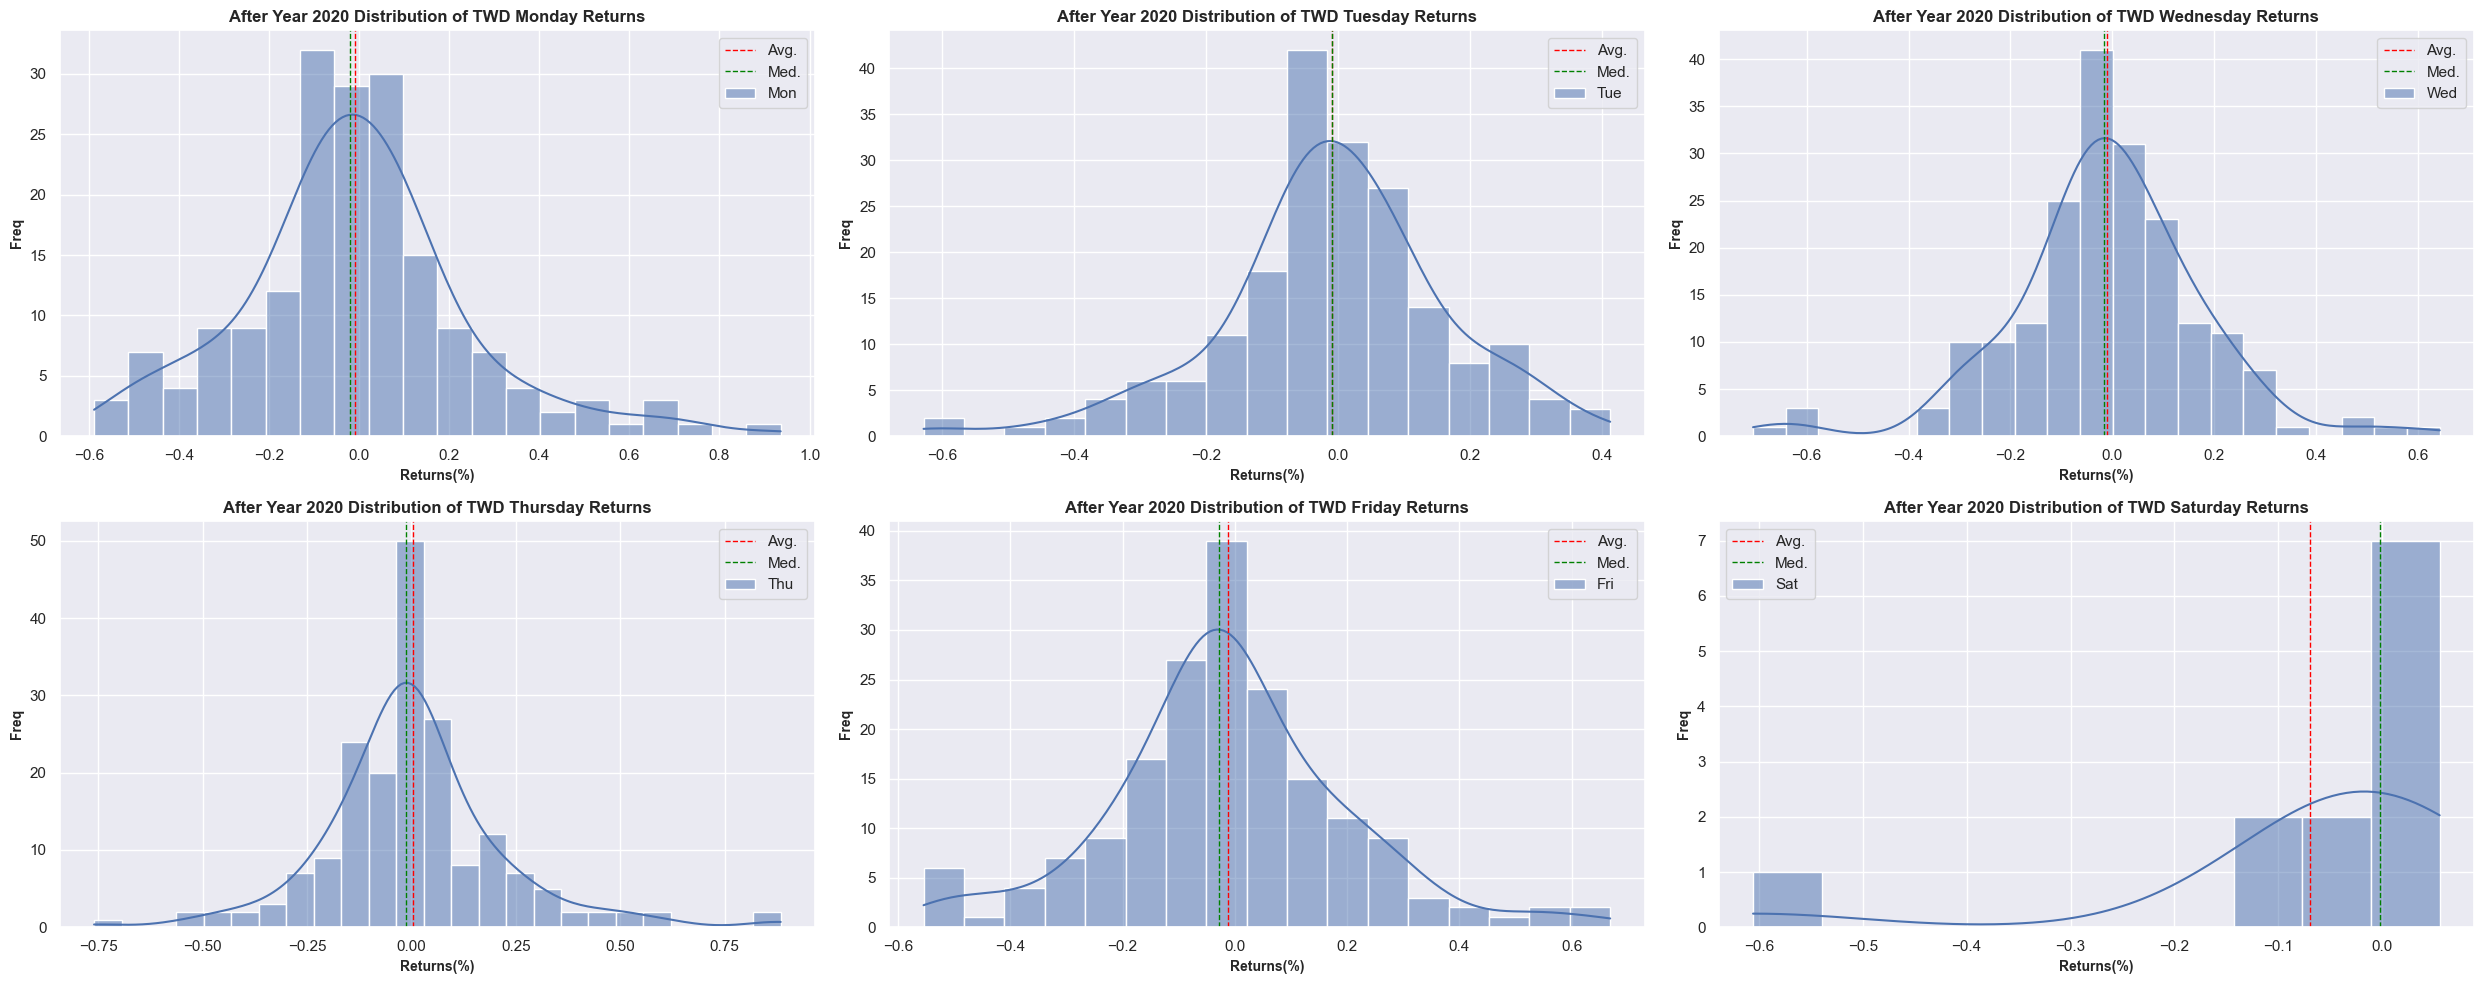

In [14]:
print("Period Three After 2020")
sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 3, figsize=(25, 10))

sns.histplot(df_after2020_Mon, kde=True, label='Mon', ax=axes[0, 0])
axes[0, 0].set_title('After Year 2020 Distribution of TWD Monday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[0, 0].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[0, 0].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Mon = df_after2020_Mon.mean()
median_value_Mon = df_after2020_Mon.median()
skewness_Mon = skew(df_after2020_Mon)
kurt_Mon = kurtosis(df_after2020_Mon)
std_dev_Mon = df_after2020_Mon.std()
max_value_Mon = df_after2020_Mon.max()
min_value_Mon = df_after2020_Mon.min()
sample_size_Mon = df_after2020_Mon.count()
axes[0, 0].axvline(mean_value_Mon, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[0, 0].axvline(median_value_Mon, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[0, 0].legend()

sns.histplot(df_after2020_Tue, kde=True, label='Tue', ax=axes[0, 1])
axes[0, 1].set_title('After Year 2020 Distribution of TWD Tuesday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[0, 1].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[0, 1].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Tue = df_after2020_Tue.mean()
median_value_Tue = df_after2020_Tue.median()
skewness_Tue = skew(df_after2020_Tue)
kurt_Tue = kurtosis(df_after2020_Tue)
std_dev_Tue = df_after2020_Tue.std()
max_value_Tue = df_after2020_Tue.max()
min_value_Tue = df_after2020_Tue.min()
sample_size_Tue = df_after2020_Tue.count()
axes[0, 1].axvline(mean_value_Tue, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[0, 1].axvline(median_value_Tue, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[0, 1].legend()

sns.histplot(df_after2020_Wed, kde=True, label='Wed', ax=axes[0, 2])
axes[0, 2].set_title('After Year 2020 Distribution of TWD Wednesday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[0, 2].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[0, 2].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Wed = df_after2020_Wed.mean()
median_value_Wed = df_after2020_Wed.median()
skewness_Wed = skew(df_after2020_Wed)
kurt_Wed = kurtosis(df_after2020_Wed)
std_dev_Wed = df_after2020_Wed.std()
max_value_Wed = df_after2020_Wed.max()
min_value_Wed = df_after2020_Wed.min()
sample_size_Wed = df_after2020_Wed.count()
axes[0, 2].axvline(mean_value_Wed, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[0, 2].axvline(median_value_Wed, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[0, 2].legend()

sns.histplot(df_after2020_Thu, kde=True, label='Thu', ax=axes[1, 0])
axes[1, 0].set_title('After Year 2020 Distribution of TWD Thursday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 0].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[1, 0].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Thu = df_after2020_Thu.mean()
median_value_Thu = df_after2020_Thu.median()
skewness_Thu = skew(df_after2020_Thu)
kurt_Thu = kurtosis(df_after2020_Thu)
std_dev_Thu = df_after2020_Thu.std()
max_value_Thu = df_after2020_Thu.max()
min_value_Thu = df_after2020_Thu.min()
sample_size_Thu = df_after2020_Thu.count()
axes[1, 0].axvline(mean_value_Thu, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[1, 0].axvline(median_value_Thu, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[1, 0].legend()

sns.histplot(df_after2020_Fri, kde=True, label='Fri', ax=axes[1, 1])
axes[1, 1].set_title('After Year 2020 Distribution of TWD Friday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 1].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[1, 1].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Fri = df_after2020_Fri.mean()
median_value_Fri = df_after2020_Fri.median()
skewness_Fri = skew(df_after2020_Fri)
kurt_Fri = kurtosis(df_after2020_Fri)
std_dev_Fri = df_after2020_Fri.std()
max_value_Fri = df_after2020_Fri.max()
min_value_Fri = df_after2020_Fri.min()
sample_size_Fri = df_after2020_Fri.count()
axes[1, 1].axvline(mean_value_Fri, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[1, 1].axvline(median_value_Fri, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[1, 1].legend()

sns.histplot(df_after2020_Sat, kde=True, label='Sat', ax=axes[1, 2])
axes[1, 2].set_title('After Year 2020 Distribution of TWD Saturday Returns', fontdict={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 2].set_xlabel('Returns(%)', fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[1, 2].set_ylabel('Freq', fontdict={'fontsize': 10, 'fontweight': 'bold'})
mean_value_Sat = df_after2020_Sat.mean()
median_value_Sat = df_after2020_Sat.median()
skewness_Sat = skew(df_after2020_Sat)
kurt_Sat = kurtosis(df_after2020_Sat)
std_dev_Sat = df_after2020_Sat.std()
max_value_Sat = df_after2020_Sat.max()
min_value_Sat = df_after2020_Sat.min()
sample_size_Sat = df_after2020_Sat.count()
axes[1, 2].axvline(mean_value_Sat, color='red', linestyle='dashed', linewidth=1, label='Avg.')
axes[1, 2].axvline(median_value_Sat, color='green', linestyle='dashed', linewidth=1, label='Med.')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

In [15]:
# Create a DataFrame for Saturday statistics using the After 2020 dataset
stats_after2020 = pd.DataFrame({
    'Mean': [mean_value_Mon, mean_value_Tue, mean_value_Wed, mean_value_Thu, mean_value_Fri, mean_value_Sat],
    'Median': [median_value_Mon, median_value_Tue, median_value_Wed, median_value_Thu, median_value_Fri, median_value_Sat],
    'Skewness': [skewness_Mon, skewness_Tue, skewness_Wed, skewness_Thu, skewness_Fri, skewness_Sat],
    'Kurtosis': [kurt_Mon, kurt_Tue, kurt_Wed, kurt_Thu, kurt_Fri, kurt_Sat],
    'Standard Deviation': [std_dev_Mon, std_dev_Tue, std_dev_Wed, std_dev_Thu, std_dev_Fri, std_dev_Sat],
    'Max Value': [max_value_Mon, max_value_Tue, max_value_Wed, max_value_Thu, max_value_Fri, max_value_Sat],
    'Min Value': [min_value_Mon, min_value_Tue, min_value_Wed, min_value_Thu, min_value_Fri, min_value_Sat],
    'Sample Size': [sample_size_Mon, sample_size_Tue, sample_size_Wed, sample_size_Thu, sample_size_Fri, sample_size_Sat]
}, index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

print("Period Three After 2020")
stats_after2020 =stats_after2020.T
stats_after2020

Period Three After 2020


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Mean,-0.009794,-0.010199,-0.010816,0.005051,-0.013056,-0.069918
Median,-0.020329,-0.010200,-0.016320,-0.013021,-0.028089,-0.001708
Skewness,0.570675,-0.505761,-0.266349,0.639860,0.190707,-2.612678
Kurtosis,1.445740,1.250081,2.378251,3.223115,1.055882,5.601695
Standard Deviation,0.251456,0.171261,0.188828,0.215872,0.209905,0.175780
Max Value,0.936008,0.412106,0.643143,0.884365,0.668721,0.055353
Min Value,-0.589053,-0.628395,-0.705316,-0.759678,-0.554653,-0.605653
Sample Size,181.000000,190.000000,194.000000,189.000000,179.000000,12.000000


In [16]:
cpu_usage = psutil.cpu_percent(interval=1)
memory = psutil.virtual_memory()
total_memory = round(memory.total / (1024 ** 3), 2)  
available_memory = round(memory.available / (1024 ** 3), 2)  
disk_usage = psutil.disk_usage('/')
total_disk_space = round(disk_usage.total / (1024 ** 3), 2)  
used_disk_space = round(disk_usage.used / (1024 ** 3), 2)  
network = psutil.net_io_counters()
sent_bytes = round(network.bytes_sent / (1024 ** 2), 2)  
received_bytes = round(network.bytes_recv / (1024 ** 2), 2)  

print('CPU Usage:', cpu_usage, '%')
print('Total Memory:', total_memory, 'GB')
print('Available Memory:', available_memory, 'GB')
print('Total Disk Space:', total_disk_space, 'GB')
print('Used Disk Space:', used_disk_space, 'GB')
print('Sent Bytes:', sent_bytes, 'MB')
print('Received Bytes:', received_bytes, 'MB')

CPU Usage: 23.8 %
Total Memory: 8.0 GB
Available Memory: 1.77 GB
Total Disk Space: 228.27 GB
Used Disk Space: 9.28 GB
Sent Bytes: 4394.29 MB
Received Bytes: 35112.72 MB
